In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
%run sqlite_execution.py
db_handler = Sqlite_Handler()
# db_handler.drop_duplicates()
info = db_handler.get_info()
info

,total,solved,unsolved
bonsai tree,1568,642,926
flower,1670,500,1170
car,1493,359,1134
motorcycle,1335,309,1026
laptop,1120,303,817
tree,393,294,99
helicopter,242,242,0
cup of orange juice,166,166,0
goose,56,42,14
cat,9,0,9


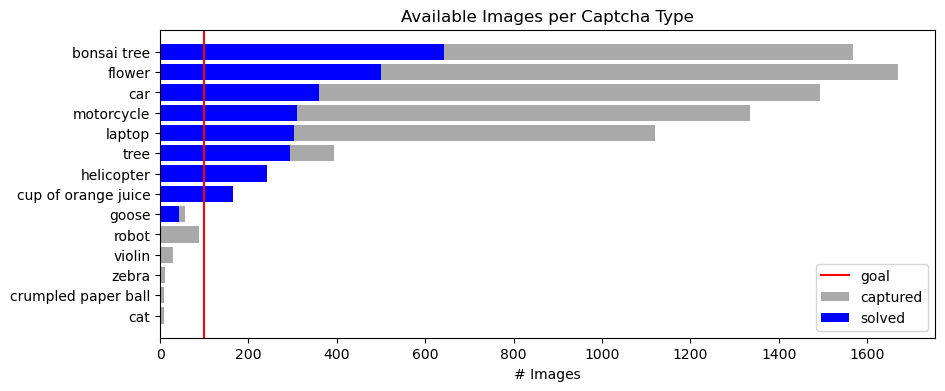

In [7]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [ ]:
%run pytorch_training.py
train_model_on_captcha_string(db_handler, "bonsai tree", save=True)
# train_models_on_all_captcha_strings(db_handler, threshold=100)

In [ ]:
%run pytorch_training.py
model_accuracy = test_models_on_all_captcha_strings(db_handler)
%run visualizer.py
plot_model_accuracy(model_accuracy, figsize=(4,10))

In [ ]:
assert 1 == 0 # to avoid execution of code below

In [ ]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db_handler, urls[0], count=100, collect_v2=False)

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db_handler)

In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db_handler)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))